<a href="https://colab.research.google.com/github/Adeebshekh00/ForkCast/blob/main/ForkCast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
himanshupoddar_zomato_bangalore_restaurants_path = kagglehub.dataset_download('himanshupoddar/zomato-bangalore-restaurants')

print('Data source import complete.')


100%|██████████| 89.0M/89.0M [00:00<00:00, 144MB/s]

Extracting files...


Data source import complete.


In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
import ast

#### Loading the data

In [3]:
csv_file_path = os.path.join(himanshupoddar_zomato_bangalore_restaurants_path, 'zomato.csv')  # Assuming 'zomato.csv' is the file name
df = pd.read_csv(csv_file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.sample(5)

url  \
6180   https://www.zomato.com/bangalore/manis-dum-bir...   
5365   https://www.zomato.com/bangalore/heights-cafe-...   
7476   https://www.zomato.com/bangalore/ginger-mint-m...   
38992  https://www.zomato.com/bangalore/firewood-biry...   
9908   https://www.zomato.com/bangalore/chination-kor...   

                                                 address  \
6180     18/1, 1st Floor, Haudin Road, Ulsoor, Bangalore   
5365   Hotel Bangalore International, 2A-2B, Crescent...   
7476   Soul Space Arena Mall, 4th Floor Doddanekundi,...   
38992  10, Bishop Cotton Complex, Next to Bangalore C...   
9908        AVS Layout, Koramangala 4th Block, Bangalore   

                                                name online_order book_table  \
6180                              Mani's Dum Biryani          Yes         No   
5365   Height's Cafe - Hotel Bangalore International          Yes         No   
7476                                     Ginger Mint          Yes         No   
38992                               Firewood Biryani          Yes         No   
9908                                       Chination          Yes         No   

         rate  votes                             phone               location  \
6180    4.0/5    175                    +91 9606441697                 Ulsoor   
5365    3.2/5      2  +91 7892884502\r\r\n080 22280237       Race Course Road   
7476    3.0/5      5                    +91 8329603511           Marathahalli   
38992  3.9 /5    456      080 41253811\n+91 7022114555         Residency Road   
9908    3.5/5      4                    +91 8700757328  Koramangala 4th Block   

           rest_type                                         dish_liked  \
6180   Casual Dining          Chicken Biryani, Vegetable Biryani, Raita   
5365   Casual Dining                                                NaN   
7476   Casual Dining                                                NaN   
38992    Quick Bites  Hariyali Chicken, Rice Kheer, Chicken Kebab, C...   
9908        Delivery                                                NaN   

                                  cuisines approx_cost(for two people)  \
6180                        Biryani, Kebab                         750   
5365             Continental, South Indian                       1,000   
7476   North Indian, South Indian, Chinese                         600   
38992                Biryani, Kebab, Rolls                         400   
9908                               Chinese                         600   

                                            reviews_list  \
6180   [('Rated 4.0', 'RATED\n  I am not a Biryani pe...   
5365                                                  []   
7476   [('Rated 2.0', 'RATED\n  I ordered a combo fro...   
38992  [('Rated 5.0', "RATED\n  If you're looking for...   
9908   [('Rated 5.0', "RATED\n  Chination!\nOne of th...   

                                               menu_item listed_in(type)  \
6180   ['Andhra Paneer Biryani Combo [Serve 1]', 'And...        Dine-out   
5365   ['All Season Burger', 'Kentucky Burger', 'The ...        Delivery   
7476                                                  []        Delivery   
38992  ['Chicken Tikka Roll', 'Biryani Rice', 'Vegeta...        Dine-out   
9908                                                  []        Delivery   

      listed_in(city)  
6180     Brigade Road  
5365     Brigade Road  
7476      Brookefield  
38992    Lavelle Road  
9908              BTM

In [6]:
df.shape

(51717, 17)

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
df.name.nunique()

8792

In [10]:
df.online_order.nunique()

2

In [11]:
df.book_table.nunique()

2

In [12]:
df.rate.nunique()

64

In [ ]:
df.location.nunique()

93

In [ ]:
df.rest_type.nunique()

93

In [ ]:
df.cuisines.nunique()

2723

In [ ]:
df['listed_in(type)'].nunique()

7

#### Converting these types of address to Geocode will be difficult

In [ ]:
df['address'][15]

'2303, 21st Cross, K R Road, 2nd Stage, Banashankari, Bangalore'

#### Menu list is not that much useful varies per restaurants

In [ ]:
df['menu_item'][5370]

"['Vanilla Fudge Brownie', 'Royal Kulfi', 'Madagascar Fine Chocolate', 'Yoghurt Wildberry', 'Black Currant Indulge', 'Butterscotch Indulge', 'Swiss Chocolate Indulge', 'Choco Crunch', 'Fruit and Nut Overload', 'Vanilla Fudge Brownie', 'Chocolate Hazelnut', 'Royal Kulfi', 'Mango Kulfi', 'Chocolate Brownie', 'Tiramisu', 'New York Cheese Cake', 'Belgian Chocolate', 'Madagascar Fine Chocolate', 'Yoghurt Wildberry', 'Strawberry Cheese Cake', 'Mango Delight Ice Cream Bar', 'Strawberry Punch Ice Cream Bar', 'Belgian Chocolate Ice Cream Bar', 'Strawberry Tub']"

In [ ]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [ ]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [ ]:
df['cuisines'][54]

'Italian, Continental, Fast Food, Chinese, Momos'

In [ ]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [ ]:
df['listed_in(city)'].nunique()

30

In [ ]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [ ]:
## location is also representing nearby region for city wise analysis i will use listed_in(city)

## EDA

### Name column

In [ ]:

top_restaurants = df['name'].value_counts()[:25].reset_index()
top_restaurants.columns = ['name', 'count']

fig = px.bar(top_restaurants,
             x='count',
             y='name',
             orientation='h',
             color='count',
             color_continuous_scale='cividis',
             title="Top 25 Most Common Restaurants")


fig.update_layout(
    height=800,
    width=800,
    xaxis_title="Count",
    yaxis_title="Restaurant Name",
    yaxis=dict(autorange="reversed")
)

fig.show()


### Online Orders column

In [ ]:
df.online_order.value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: int64

In [ ]:
# now i want to check whether the famous restaurants seen above are online or not

In [ ]:
df[df['name'] == 'Cafe Coffee Day']['online_order'][10:52]

3323     Yes
3785     Yes
4110     Yes
4543      No
4618     Yes
5036      No
5313     Yes
5940      No
5991     Yes
6783      No
6846     Yes
7801      No
8306     Yes
8746     Yes
10382     No
10501     No
12095    Yes
12504     No
13400     No
13544    Yes
14614    Yes
14911    Yes
15432    Yes
15828     No
16954    Yes
17078     No
17608    Yes
17844    Yes
19440    Yes
19879    Yes
20940     No
21151     No
21795    Yes
22120    Yes
23134     No
23265    Yes
23876    Yes
24050    Yes
24643     No
24740    Yes
25169     No
25356    Yes
Name: online_order, dtype: object

In [ ]:
df.loc[4543]

url                            https://www.zomato.com/bangalore/cafe-coffee-d...
address                        KAIKONDRAHALLI SARJAPUR - BANGALORE First Floo...
name                                                             Cafe Coffee Day
online_order                                                                  No
book_table                                                                    No
rate                                                                       3.1/5
votes                                                                          7
phone                                           +91 9071381541\r\n+91 9880565683
location                                                           Sarjapur Road
rest_type                                                                   Cafe
dish_liked                                                                   NaN
cuisines                                                         Cafe, Fast Food
approx_cost(for two people)                                                  900
reviews_list                   [('Rated 3.0', "RATED\n  Nice place to hangout...
menu_item                                                                     []
listed_in(type)                                                         Desserts
listed_in(city)                                                        Bellandur
Name: 4543, dtype: object

In [ ]:
## Their are different outlets of a particular brand in some areas they are online and in some areas they are not

In [ ]:
import plotly.express as px

data = pd.DataFrame({'Online Order': ['Yes', 'No'], 'Count': [(df['online_order']=="Yes").sum(), (df['online_order']=="No").sum()]})

fig = px.pie(data,
             names='Online Order',
             values='Count',
             title="Online Order Distribution",
             color_discrete_sequence=px.colors.qualitative.Set2,  # Custom colors
             hover_data={'Count': True})  # Show count on hover

fig.update_layout(
    width=600,
    height=500,
    font=dict(size=14)
)


fig.show()


### Book Table Column

In [ ]:
df.book_table.value_counts()

book_table
No     45268
Yes     6449
Name: count, dtype: int64

In [ ]:
data = pd.DataFrame({'Table Bookings': ['Yes', 'No'], 'Count': [(df['book_table']=="Yes").sum(), (df['book_table']=="No").sum()]})

fig = px.pie(data,
             names='Table Bookings',
             values='Count',
             title="Table Bookings Distribution",
             color_discrete_sequence=px.colors.qualitative.Set3,  # Custom colors
             hover_data={'Count': True})  # Show count on hover

fig.update_layout(
    width=600,
    height=500,
    font=dict(size=14)
)

fig.show()


In [ ]:
## majorily restaurants dont allow table booking this is also a general trend in India only expensive ones gives this facilities.

### Rate column

In [13]:
df.rate.value_counts()
# large majority of restaurants are new

rate
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64

In [14]:
df.isnull().sum()
# there are 7775 null values as well

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [15]:
df[df['rate'] == "NEW"]
## all new have zero votes

url  \
72     https://www.zomato.com/bangalore/spicy-tandoor...   
75     https://www.zomato.com/bangalore/om-sri-vinaya...   
110    https://www.zomato.com/bangalore/hari-super-sa...   
130    https://www.zomato.com/bangalore/roll-magic-fa...   
131    https://www.zomato.com/bangalore/foodlieious-m...   
...                                                  ...   
51585  https://www.zomato.com/bangalore/wow-tiffin-fo...   
51586  https://www.zomato.com/bangalore/quick-bites-w...   
51603  https://www.zomato.com/bangalore/shiv-sagar-1-...   
51604  https://www.zomato.com/bangalore/nawab-di-biry...   
51605  https://www.zomato.com/bangalore/bong-connecti...   

                                                 address  \
72     Opposite ICICi Bank, Hanuman Nagar, Banashanka...   
75     39, S B M Colony, Near-Sita Circle, 1st Stage,...   
110    594, 24 The Cross BSK, Opposte Oriental Bank, ...   
130    28, 4th Cross Road, Dwaraka Nagar, Banashankar...   
131    3/16, 22 Main Road, Magenta Block, PES College...   
...                                                  ...   
51585  Near Rama Temple, Immadihalli Road, Whitefield...   
51586  119/5, Pattandur Agrahara, Near Brigade Tech p...   
51603  Shop No 10, Food Court, 2nd Floor, Phoenix Mar...   
51604  17, Thubarahalli Village, Hobli, Varthur Main ...   
51605  328/476, Immihalli Main Road, Byrappa Layout, ...   

                            name online_order book_table rate  votes  \
72                 Spicy Tandoor           No         No  NEW      0   
75         Om Sri Vinayaka Chats           No         No  NEW      0   
110          Hari Super Sandwich           No         No  NEW      0   
130         Roll Magic Fast Food           No         No  NEW      0   
131    Foodlieious Multi Cuisine           No         No  NEW      0   
...                          ...          ...        ...  ...    ...   
51585            Wow Tiffin Food           No         No  NEW      0   
51586                Quick Bites          Yes         No  NEW      0   
51603                 Shiv sagar          Yes         No  NEW      0   
51604           Nawab Di Biryani           No         No  NEW      0   
51605           Bong Connections           No         No  NEW      0   

                                  phone      location  \
72                       +91 8050884222  Banashankari   
75                       +91 8553206035  Banashankari   
110                      +91 9886722163  Banashankari   
130                      +91 9731409204  Banashankari   
131    +91 9168753522\r\n+91 8217877100  Banashankari   
...                                 ...           ...   
51585                    +91 9535041209    Whitefield   
51586    +91 9742377087\n+91 7899303299    Whitefield   
51603    +91 9513300048\n+91 8067266097    Whitefield   
51604    +91 7899298400\n+91 9818654628    Whitefield   
51605                    +91 7209035062    Whitefield   

                     rest_type dish_liked  \
72                 Quick Bites        NaN   
75          Takeaway, Delivery        NaN   
110         Takeaway, Delivery        NaN   
130         Takeaway, Delivery        NaN   
131                Quick Bites        NaN   
...                        ...        ...   
51585              Quick Bites        NaN   
51586              Quick Bites        NaN   
51603  Quick Bites, Food Court        NaN   
51604       Takeaway, Delivery        NaN   
51605              Quick Bites        NaN   

                                  cuisines approx_cost(for two people)  \
72                            North Indian                         150   
75                  Street Food, Fast Food                         500   
110             Sandwich, Pizza, Beverages                         200   
130                Biryani, Rolls, Chinese                         200   
131                           North Indian                         100   
...                                    ...                         ...   
51

In [16]:
new_restaurants_df = df[(df['rate'] == "NEW") | (df['rate'] == "-")]

In [17]:
new_restaurants_df.shape

(2277, 17)

In [18]:
#later these new restaurants will be used for predicting the success of restaurants

In [19]:
established_restaurants_df = df[(df['rate'] != "NEW") & (df['rate'] != "-")]

In [20]:
established_restaurants_df.shape

(49440, 17)

In [21]:
established_restaurants_df['rate'] = established_restaurants_df['rate'].str.replace('/5', '', regex=False).astype(float)

In [22]:
established_restaurants_df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 49440, dtype: float64

In [23]:
established_restaurants_df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1190
location                          21
rest_type                        225
dish_liked                     25948
cuisines                          45
approx_cost(for two people)      341
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [24]:
fig = px.histogram(established_restaurants_df,
                   x='rate',
                   nbins=20,  # Adjust the number of bins
                   title="Distribution of Ratings",
                   color_discrete_sequence=['#e1c5e3'],  # Custom color
                   opacity=0.7)  # Adjust transparency

# Update layout
fig.update_layout(
    xaxis_title="Rating",
    yaxis_title="Count",
    bargap=0.1,  # Adjust gap between bars
    width=800,   # Set width
    height=500   # Set height
)

# Show the plot
fig.show()

In [25]:
df = established_restaurants_df

In [26]:
df.shape

(49440, 17)

In [27]:

yes_ratings = df[df['online_order'] == "Yes"]['rate'].dropna().tolist()
no_ratings = df[df['online_order'] == "No"]['rate'].dropna().tolist()

# Create KDE (PDE) plot with shading
fig = ff.create_distplot(
    [yes_ratings, no_ratings],
    group_labels=["Online Order: Yes", "Online Order: No"],
    show_hist=False,  # Hide histogram
    show_rug=False ,   # Hide rug plot
)

fig.update_layout(
    title="Probability Density Estimate (PDE) of Ratings",
    xaxis_title="Rating",
    yaxis_title="Density",
    width=800,
    height=500
)

# Show plot
fig.show()


In [28]:

booking_allowed = established_restaurants_df[established_restaurants_df['book_table'] == "Yes"]['rate'].dropna().tolist()
booking_notallowed = established_restaurants_df[established_restaurants_df['book_table'] == "No"]['rate'].dropna().tolist()

# Create KDE (PDE) plot with shading
fig = ff.create_distplot(
    [booking_allowed, booking_notallowed],
    group_labels=["Bookings allowed: Yes", "Bookings notallowed: No"],
    show_hist=False,  # Hide histogram
    show_rug=False ,   # Hide rug plot
)

fig.update_layout(
    title="Probability Density Estimate (PDE) of Ratings",
    xaxis_title="Rating",
    yaxis_title="Density",
    width=800,
    height=500
)

# Show plot
fig.show()


In [ ]:
# the restaurants which are online there rating is slightly better
## but the restaurants which allow bookings have  high ratings in general as compared to those who dont allow
## let me see whether these restaurants which allow bookings are expensive

### Cost column

In [29]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [30]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1190
location                          21
rest_type                        225
dish_liked                     25948
cuisines                          45
approx_cost(for two people)      341
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [31]:
df = df.dropna(subset=['approx_cost(for two people)'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49099 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          49099 non-null  object 
 1   address                      49099 non-null  object 
 2   name                         49099 non-null  object 
 3   online_order                 49099 non-null  object 
 4   book_table                   49099 non-null  object 
 5   rate                         41418 non-null  float64
 6   votes                        49099 non-null  int64  
 7   phone                        48238 non-null  object 
 8   location                     49099 non-null  object 
 9   rest_type                    48897 non-null  object 
 10  dish_liked                   23356 non-null  object 
 11  cuisines                     49080 non-null  object 
 12  approx_cost(for two people)  49099 non-null  object 
 13  reviews_list         

In [33]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '80', '50', '190', '1,700', '180', '1,350', '2,200',
       '1,400', '2,000', '1,800', '1,900', '330', '2,500', '2,100',
       '3,000', '2,800', '3,400', '40', '1,250', '3,500', '4,000',
       '2,400', '2,600', '120', '1,450', '469', '70', '3,200', '60',
       '240', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140', '360'], dtype=object)

In [ ]:
##issue are values like 1,200
##train_df['approx_cost(for two people)'] = train_df['approx_cost(for two people)'].astype(float)

In [34]:
df = df.rename(columns={'approx_cost(for two people)': 'avg_cost'})


In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'avg_cost',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [36]:
fig = go.Figure()

fig.add_trace(go.Box(
    y=df["avg_cost"],
    name="Average Cost",
    boxmean=True,  # Shows mean as a line
    marker_color="blue"
))

fig.update_layout(
    title="Box Plot of Column",
    yaxis_title="Values",
    width=700,
    height=500
)

fig.show()


In [37]:
fig = px.histogram(df, x="avg_cost", nbins=30, histnorm='density', opacity=0.7)
fig.update_layout(title="Histogram", xaxis_title="Cost", yaxis_title="Density",width=600,height=400)
fig.show()

In [ ]:
## lets first observe these expensive hotels their online order , booking , rating

In [35]:
df['avg_cost'] = df['avg_cost'].str.replace(',', '').astype(float)

In [ ]:
df[df['avg_cost'] >= 3000]['rate'].max()

4.6

In [ ]:
df[df['avg_cost'] >= 3000]['rate'].min()

3.4

In [ ]:
df[(df['avg_cost'] >= 3000) & (df['rate'] > 4)]

url  \
4983   https://www.zomato.com/bangalore/rim-naam-the-...   
4991   https://www.zomato.com/bangalore/le-jardin-the...   
4996   https://www.zomato.com/bangalore/the-market-th...   
5007   https://www.zomato.com/bangalore/monsoon-the-p...   
5247   https://www.zomato.com/bangalore/shiro-lavelle...   
...                                                  ...   
48765  https://www.zomato.com/bangalore/bang-the-ritz...   
48774  https://www.zomato.com/bangalore/kaz%C3%A9-1-l...   
48775  https://www.zomato.com/bangalore/shiro-lavelle...   
51107  https://www.zomato.com/bangalore/alto-vino-ben...   
51188  https://www.zomato.com/bangalore/whitefield-ba...   

                                                 address  \
4983               The Oberoi, 37-39, MG Road, Bangalore   
4991               The Oberoi, 37-39, MG Road, Bangalore   
4996     The Ritz-Carlton, 99, Residency Road, Bangalore   
5007        The Park Bangalore, 14/7, MG Road, Bangalore   
5247   2nd Floor, UB City Mall, Vittal Mallya Road, L...   
...                                                  ...   
48765    The Ritz-Carlton, 99, Residency Road, Bangalore   
48774      909 SKAV, 21st floor, Lavelle Road, Bangalore   
48775  2nd Floor, UB City Mall, Vittal Mallya Road, L...   
51107  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
51188  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   

                                                    name online_order  \
4983                               Rim Naam - The Oberoi           No   
4991                              Le Jardin - The Oberoi           No   
4996                       The Market - The Ritz-Carlton           No   
5007                        Monsoon - The Park Bangalore           No   
5247                                               Shiro          Yes   
...                                                  ...          ...   
48765                            Bang - The Ritz-Carlton           No   
48774  KazÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...           No   
48775                                              Shiro          Yes   
51107    Alto Vino - Bengaluru Marriott Hotel Whitefield           No   
51188  Whitefield Bar and Grill - Bengaluru Marriott ...           No   

      book_table  rate  votes                                   phone  \
4983          No   4.6    979                            080 25585858   
4991          No   4.3    687            080 25585858\r\n080 41358205   
4996         Yes   4.3    622                            080 49148341   
5007         Yes   4.2    271        +91 9035808038\r\n+91 9049882302   
5247         Yes   4.4   2229  +91 8041738864\r\r\r\r\n+91 8041738861   
...          ...   ...    ...                                     ...   
48765        Yes   4.2    479                            080 49148000   
48774        Yes   4.4    895          +91 8043020299\n+91 8043020399   
48775        Yes   4.4   2247          +91 8041738864\n+91 8041738861   
51107        Yes   4.3    267            080 49435000\n+91 8884477218   
51188        Yes   4.1     78                            080 49653130   

             location            rest_type  \
4983          MG Road          Fine Dining   
4991          MG Road          Fine Dining   
4996   Residency Road          Fine Dining   
5007          MG Road          Fine Dining   
5247     Lavelle Road  Fine Dining, Lounge   
...               ...                  ...   
48765  Residency Road               Lounge   
48774    Lavelle Road          Fine Dining   
48775    Lavelle Road  Fine Dining, Lounge   
51107      Whitefield          Fine Dining   
51188      Whitefield          Fine Dining   

                                              dish_liked  \
4983   Seafood Soup, Mocktails, Mushroom Salad, Wine,...   
4991   Breakfast Buffet, Biryani, Salads, Chocolate C...   
4996    Pizza, Waffles, Pasta, Sushi, Roti, Salads, Fish   
5007   Salads, Brownie, Cheesecake, Salad, Biryani, D...   
5247

In [ ]:
df[(df['avg_cost'] >= 3000)]

url  \
4983   https://www.zomato.com/bangalore/rim-naam-the-...   
4991   https://www.zomato.com/bangalore/le-jardin-the...   
4996   https://www.zomato.com/bangalore/the-market-th...   
5007   https://www.zomato.com/bangalore/monsoon-the-p...   
5247   https://www.zomato.com/bangalore/shiro-lavelle...   
...                                                  ...   
48811  https://www.zomato.com/bangalore/i-bar-the-par...   
48817  https://www.zomato.com/bangalore/aqua-the-park...   
51107  https://www.zomato.com/bangalore/alto-vino-ben...   
51151  https://www.zomato.com/bangalore/terracotta-wh...   
51188  https://www.zomato.com/bangalore/whitefield-ba...   

                                                 address  \
4983               The Oberoi, 37-39, MG Road, Bangalore   
4991               The Oberoi, 37-39, MG Road, Bangalore   
4996     The Ritz-Carlton, 99, Residency Road, Bangalore   
5007        The Park Bangalore, 14/7, MG Road, Bangalore   
5247   2nd Floor, UB City Mall, Vittal Mallya Road, L...   
...                                                  ...   
48811       The Park Bangalore, 14/7, MG Road, Bangalore   
48817       The Park Bangalore, 14/7, MG Road, Bangalore   
51107  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
51151    Vivanta Whitefield, ITPB, Whitefield, Bangalore   
51188  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   

                                                    name online_order  \
4983                               Rim Naam - The Oberoi           No   
4991                              Le Jardin - The Oberoi           No   
4996                       The Market - The Ritz-Carlton           No   
5007                        Monsoon - The Park Bangalore           No   
5247                                               Shiro          Yes   
...                                                  ...          ...   
48811                         i-Bar - The Park Bangalore           No   
48817                          Aqua - The Park Bangalore           No   
51107    Alto Vino - Bengaluru Marriott Hotel Whitefield           No   
51151                              Terracotta Whitefield           No   
51188  Whitefield Bar and Grill - Bengaluru Marriott ...           No   

      book_table  rate  votes                                   phone  \
4983          No   4.6    979                            080 25585858   
4991          No   4.3    687            080 25585858\r\n080 41358205   
4996         Yes   4.3    622                            080 49148341   
5007         Yes   4.2    271        +91 9035808038\r\n+91 9049882302   
5247         Yes   4.4   2229  +91 8041738864\r\r\r\r\n+91 8041738861   
...          ...   ...    ...                                     ...   
48811         No   3.8    625            080 25320445\n+91 9049882302   
48817        Yes   4.0    196          +91 9035808038\n+91 9049882302   
51107        Yes   4.3    267            080 49435000\n+91 8884477218   
51151        Yes   4.0    244          +91 8904489150\n+91 8073928636   
51188        Yes   4.1     78                            080 49653130   

             location            rest_type  \
4983          MG Road          Fine Dining   
4991          MG Road          Fine Dining   
4996   Residency Road          Fine Dining   
5007          MG Road          Fine Dining   
5247     Lavelle Road  Fine Dining, Lounge   
...               ...                  ...   
48811         MG Road               Lounge   
48817         MG Road          Lounge, Bar   
51107      Whitefield          Fine Dining   
51151      Whitefield          Fine Dining   
51188      Whitefield          Fine Dining   

                                              dish_liked  \
4983   Seafood Soup, Mocktails, Mushroom Salad, Wine,...   
4991   Breakfast Buffet, Biryani, Salads, Chocolate C...   
4996    Pizza, Waffles, Pasta, Sushi, Roti, Salads, Fish   
5007   Salads, Brownie, Cheesecake, Salad, Biryani, D...   
5247

In [ ]:
195/241*100

80.91286307053942

In [ ]:
## more than 80% of restaurants which are expensive have good rating

In [ ]:
## store top 100 most expensive restaurants later for dashboard

In [ ]:
# Select top 100 rows based on 'cost' in descending order
top_100_expensive_restaurants = df.nlargest(100, 'avg_cost')[['address', 'name', 'online_order','book_table','rate','votes','rest_type','cuisines','avg_cost','reviews_list','listed_in(type)', 'listed_in(city)']]  # Select specific columns


In [ ]:
top_100_expensive_restaurants

address  \
19139  The Leela Palace, 23, Old Airport Road, Bangalore   
45618  The Leela Palace, 23, Old Airport Road, Bangalore   
40266  ITC Windsor, 25 Windsor Square, Sankey Road, B...   
41591  Radisson Blu, 90/4, Outer Ring Road, Munnekoll...   
42141  Radisson Blu, 90/4, Outer Ring Road, Munnekoll...   
...                                                  ...   
6243               The Oberoi, 37-39, MG Road, Bangalore   
6283          ITC Gardenia, 1, Residency Road, Bangalore   
6603       909 SKAV, 21st floor, Lavelle Road, Bangalore   
6604   2nd Floor, UB City Mall, Vittal Mallya Road, L...   
6620     The Ritz-Carlton, 99, Residency Road, Bangalore   

                                         name online_order book_table  rate  \
19139  Le Cirque Signature - The Leela Palace           No        Yes   4.3   
45618  Le Cirque Signature - The Leela Palace           No        Yes   4.3   
40266              Royal Afghan - ITC Windsor           No        Yes   4.3   
41591                  Malties - Radisson Blu           No         No   4.3   
42141                  Malties - Radisson Blu           No         No   4.3   
...                                       ...          ...        ...   ...   
6243                   Polo Club - The Oberoi           No         No   4.1   
6283                    Ottimo - ITC Gardenia           No        Yes   4.3   
6603      KazÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©           No        Yes   4.4   
6604                                    Shiro          Yes        Yes   4.4   
6620                  Bang - The Ritz-Carlton           No        Yes   4.3   

       votes            rest_type                                   cuisines  \
19139    126          Fine Dining                            French, Italian   
45618    128          Fine Dining                            French, Italian   
40266    413          Fine Dining                      North Indian, Mughlai   
41591     53               Lounge                     Continental, Fast Food   
42141     53               Lounge                     Continental, Fast Food   
...      ...                  ...                                        ...   
6243     117          Fine Dining  American, North Indian, European, Tex-Mex   
6283     164          Fine Dining                             Italian, Salad   
6603     858          Fine Dining                      Asian, Japanese, Thai   
6604    2229  Fine Dining, Lounge                            Japanese, Asian   
6620     474               Lounge                                Finger Food   

       avg_cost                                       reviews_list  \
19139    6000.0  [('Rated 5.0', 'RATED\n  Awesome would be an u...   
45618    6000.0  [('Rated 5.0', 'RATED\n  Awesome would be an u...   
40266    5000.0  [('Rated 5.0', 'RATED\n  It is just Bukhara wi...   
41591    4500.0  [('Rated 3.0', "RATED\n  We had visited this p...   
42141    4500.0  [('Rated 3.0', "RATED\n  We had visited this p...   
...         ...                                                ...   
6243     3000.0  [('Rated 4.0', 'RATED\n  Came here for a cup o...   
6283     3000.0  [('Rated 5.0', 'RATED\n  A proper Italian rest...   
6603     3000.0  [('Rated 4.0', "RATED\n  The one place in Bang...   
6604     3000.0  [('Rated 4.0', 'RATED\n  I would like to sugge...   
6620     3000.0  [('Rated 3.0', 'RATED\n  ItÃ\x83Ã\x83Ã\x82Ã...   

          listed_in(type)   listed_in(city)  
19139            Dine-out       Indiranagar  
45618            Dine-out  Old Airport Road  
40266            Dine-out      Malleshwaram  
41591            Dine-out      Marathahalli  
42141  Drinks & nightlife      Marathahalli  
...                   ...               ...  
6243             Dine-out      Brigade Road  
6283             Dine-out      Brigade Road  
6603   Drinks & nightlife      Brigade Road  
6604   Drinks & nightlife      Brigade Road  
6620   Drinks & nightlife      Brigade Road  

[100 rows x 12 columns]

In [ ]:
top_100_expensive_restaurants['online_order'].value_counts()


online_order
No     97
Yes     3
Name: count, dtype: int64

In [ ]:
top_100_expensive_restaurants['book_table'].value_counts()

book_table
Yes    87
No     13
Name: count, dtype: int64

In [ ]:
top_100_expensive_restaurants.to_csv("expensive_restaurants.csv", index=False)

In [ ]:
df = df[df['avg_cost'] < 3000]

In [ ]:
df.shape

(48858, 17)

#### key highlight as i said earlier the expensive and high star restaurants offer booking and not online food delivery services in general

In [38]:
fig = go.Figure()

fig.add_trace(go.Box(
    y=df["avg_cost"],
    name="Average Cost",
    boxmean=True,
    marker_color="blue"
))

fig.update_layout(
    title="Box Plot of Column",
    yaxis_title="Values",
    width=700,
    height=500
)

fig.show()


### Votes Column

In [ ]:
fig = go.Figure()

# Box plot for restaurants that accept online orders
fig.add_trace(go.Box(
    y=df[df["online_order"] == "Yes"]["votes"],
    name="Online Order: Yes",
    boxmean=True,  # Shows mean
    marker_color="blue"
))

# Box plot for restaurants that do NOT accept online orders
fig.add_trace(go.Box(
    y=df[df["online_order"] == "No"]["votes"],
    name="Online Order: No",
    boxmean=True,
    marker_color="red"
))


fig.update_layout(
    title="Box Plot for Customer Votes (Online vs. Not Online)",
    yaxis_title="Votes",
    width=800,
    height=500
)

fig.show()


In [ ]:
## online order restaurants have bit more votes might be its easier to vote

In [ ]:
df['votes'].max()

16832

In [ ]:
df[df['votes'] == 16832]

## Amazing restaurant in all parameters

url  \
49170  https://www.zomato.com/bangalore/byg-brewski-b...   
49627  https://www.zomato.com/bangalore/byg-brewski-b...   
50059  https://www.zomato.com/bangalore/byg-brewski-b...   

                                          address  \
49170  Behind MK Retail, Sarjapur Road, Bangalore   
49627  Behind MK Retail, Sarjapur Road, Bangalore   
50059  Behind MK Retail, Sarjapur Road, Bangalore   

                              name online_order book_table  rate  votes  \
49170  Byg Brewski Brewing Company          Yes        Yes   4.9  16832   
49627  Byg Brewski Brewing Company          Yes        Yes   4.9  16832   
50059  Byg Brewski Brewing Company          Yes        Yes   4.9  16832   

                phone       location     rest_type  \
49170  +91 8039514766  Sarjapur Road  Microbrewery   
49627  +91 8039514766  Sarjapur Road  Microbrewery   
50059  +91 8039514766  Sarjapur Road  Microbrewery   

                                              dish_liked  \
49170  Cocktails, Butter Chicken, Dahi Kebab, Rajma C...   
49627  Cocktails, Butter Chicken, Dahi Kebab, Rajma C...   
50059  Cocktails, Butter Chicken, Dahi Kebab, Rajma C...   

                                                cuisines  avg_cost  \
49170  Continental, North Indian, Italian, South Indi...    1600.0   
49627  Continental, North Indian, Italian, South Indi...    1600.0   
50059  Continental, North Indian, Italian, South Indi...    1600.0   

                                            reviews_list menu_item  \
49170  [('Rated 5.0', "RATED\n  This is an absolute g...        []   
49627  [('Rated 4.0', 'RATED\n  Visiting a microbrewe...        []   
50059  [('Rated 4.0', 'RATED\n  Visiting a microbrewe...        []   

          listed_in(type) listed_in(city)  
49170            Delivery   Sarjapur Road  
49627            Dine-out   Sarjapur Road  
50059  Drinks & nightlife   Sarjapur Road

In [ ]:
df[df['votes'] == 16345]

url  \
3921  https://www.zomato.com/bangalore/byg-brewski-b...   
4801  https://www.zomato.com/bangalore/byg-brewski-b...   
4944  https://www.zomato.com/bangalore/byg-brewski-b...   

                                         address                         name  \
3921  Behind MK Retail, Sarjapur Road, Bangalore  Byg Brewski Brewing Company   
4801  Behind MK Retail, Sarjapur Road, Bangalore  Byg Brewski Brewing Company   
4944  Behind MK Retail, Sarjapur Road, Bangalore  Byg Brewski Brewing Company   

     online_order book_table  rate  votes           phone       location  \
3921          Yes        Yes   4.9  16345  +91 8039514766  Sarjapur Road   
4801          Yes        Yes   4.9  16345  +91 8039514766  Sarjapur Road   
4944          Yes        Yes   4.9  16345  +91 8039514766  Sarjapur Road   

         rest_type                                         dish_liked  \
3921  Microbrewery  Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...   
4801  Microbrewery  Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...   
4944  Microbrewery  Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...   

                                               cuisines  avg_cost  \
3921  Continental, North Indian, Italian, South Indi...    1600.0   
4801  Continental, North Indian, Italian, South Indi...    1600.0   
4944  Continental, North Indian, Italian, South Indi...    1600.0   

                                           reviews_list  \
3921  [('Rated 5.0', 'RATED\n  I have been to this p...   
4801  [('Rated 5.0', 'RATED\n  I have been to this p...   
4944  [('Rated 5.0', 'RATED\n  I have been to this p...   

                                              menu_item     listed_in(type)  \
3921                                                 []            Delivery   
4801  ['Creamy Mushroom and Truffle Soup', 'Kung Pao...            Dine-out   
4944  ['Creamy Mushroom and Truffle Soup', 'Kung Pao...  Drinks & nightlife   

     listed_in(city)  
3921       Bellandur  
4801       Bellandur  
4944       Bellandur

In [ ]:
# Byg Brewski Brewing Company

In [ ]:
df[df['votes'] > 6000]

url  \
3762   https://www.zomato.com/bangalore/the-black-pea...   
3921   https://www.zomato.com/bangalore/byg-brewski-b...   
4131   https://www.zomato.com/bangalore/hoot-sarjapur...   
4800   https://www.zomato.com/bangalore/the-black-pea...   
4801   https://www.zomato.com/bangalore/byg-brewski-b...   
...                                                  ...   
50060  https://www.zomato.com/bangalore/hoot-sarjapur...   
50080  https://www.zomato.com/bangalore/hoot-sarjapur...   
51038  https://www.zomato.com/bangalore/biergarten-wh...   
51649  https://www.zomato.com/bangalore/biergarten-wh...   
51685  https://www.zomato.com/bangalore/biergarten-wh...   

                                                 address  \
3762   20/7, Swamy Legato, Outer Ring Road, Kadubeesa...   
3921          Behind MK Retail, Sarjapur Road, Bangalore   
4131   2034/69, Block 2, Kaikondrahalli, Varthur Hobl...   
4800   20/7, Swamy Legato, Outer Ring Road, Kadubeesa...   
4801          Behind MK Retail, Sarjapur Road, Bangalore   
...                                                  ...   
50060  2034/69, Block 2, Kaikondrahalli, Varthur Hobl...   
50080  2034/69, Block 2, Kaikondrahalli, Varthur Hobl...   
51038  2, Doddanekkundi, Whitefield Road, Mahadevpura...   
51649  2, Doddanekkundi, Whitefield Road, Mahadevpura...   
51685  2, Doddanekkundi, Whitefield Road, Mahadevpura...   

                              name online_order book_table  rate  votes  \
3762               The Black Pearl           No        Yes   4.8   7023   
3921   Byg Brewski Brewing Company          Yes        Yes   4.9  16345   
4131                          Hoot          Yes        Yes   4.2   7193   
4800               The Black Pearl           No        Yes   4.8   7023   
4801   Byg Brewski Brewing Company          Yes        Yes   4.9  16345   
...                            ...          ...        ...   ...    ...   
50060                         Hoot          Yes        Yes   4.2   7330   
50080                         Hoot          Yes        Yes   4.2   7330   
51038                   Biergarten           No        Yes   4.7   7064   
51649                   Biergarten           No        Yes   4.7   7064   
51685                   Biergarten           No        Yes   4.7   7064   

                              phone       location           rest_type  \
3762                   080 49653069   Marathahalli  Casual Dining, Bar   
3921                 +91 8039514766  Sarjapur Road        Microbrewery   
4131   080 30474545\r\n080 30695454  Sarjapur Road   Microbrewery, Pub   
4800                   080 49653069   Marathahalli  Casual Dining, Bar   
4801                 +91 8039514766  Sarjapur Road        Microbrewery   
...                             ...            ...                 ...   
50060    080 30474545\n080 30695454  Sarjapur Road   Microbrewery, Pub   
50080    080 30474545\n080 30695454  Sarjapur Road   Microbrewery, Pub   
51038                +91 8047096233     Whitefield   Microbrewery, Pub   
51649                +91 8047096233     Whitefield   Microbrewery, Pub   
51685                +91 8047096233     Whitefield   Microbrewery, Pub   

                                              dish_liked  \
3762   Dahipuri, Jal-jeera, Chicken Grill, Mutton See...   
3921   Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...   
4131   Sea Food, Craft Beer, Cocktails, Tempura Prawn...   
4800   Dahipuri, Jal-jeera, Chicken Grill, Mutton See...   
4801   Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...   
...                                                  ...   
50060  Sea Food, Craft Beer, Cocktails, Tempura Prawn...   
50080  Sea Food, Craft Beer, Cocktails, Tempura Prawn...   
51038  Wheat Beer, Risotto, Craft Beer, Caesar Salad,...   
51649  Wheat Beer, Risotto, Craft Beer, Caesar Salad,...   
51685  Wheat Beer, Risotto, Craft Beer, Caesar Salad,...   

                                                cuisines  avg_cost  \
3762          North Indian, Eu

In [ ]:
fig = px.scatter(
    df, x="votes", y="rate",
    title="Relationship Between Votes and Rating",
    labels={"votes": "Number of Votes", "rate": "Rating"},
    opacity=0.7,
    color="rate",
    size="votes"
)

fig.update_layout(
    width=800, height=500,
    xaxis_title="Number of Votes",
    yaxis_title="Rating"
)

fig.show()

In [ ]:
## it is clearly visible as the rating inc the votes also inc

### Rest Type column

In [ ]:
df['rest_type'].value_counts()[:10]

rest_type
Quick Bites           17922
Casual Dining         10011
Cafe                   3565
Delivery               2477
Dessert Parlor         2170
Takeaway, Delivery     1837
Casual Dining, Bar     1105
Bakery                 1070
Beverage Shop           805
Bar                     676
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

url                    0
address                0
name                   0
online_order           0
book_table             0
rate                7681
votes                  0
phone                861
location               0
rest_type            202
dish_liked         25735
cuisines              19
avg_cost               0
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
dtype: int64

In [ ]:
df[df['rest_type'] == "Quick Bites"]['name'].value_counts()[:10]

name
Five Star Chicken        69
McDonald's               59
Domino's Pizza           59
KFC                      56
Ambur Hot Dum Biryani    53
Rolls On Wheels          51
Burger King              51
Pizza Stop               48
Goli Vada Pav No. 1      46
Subway                   45
Name: count, dtype: int64

In [ ]:
df[df['rest_type'] == "Quick Bites"]['listed_in(city)'].value_counts()[:10]

listed_in(city)
BTM                      1203
Koramangala 7th Block    1065
Koramangala 5th Block    1037
Koramangala 4th Block     951
Koramangala 6th Block     902
Jayanagar                 877
JP Nagar                  750
Marathahalli              667
HSR                       615
Bannerghatta Road         569
Name: count, dtype: int64

In [ ]:
df[df['rest_type'] == "Casual Dining"]['name'].value_counts()[:10]

name
Empire Restaurant            58
Mani's Dum Biryani           47
Chung Wah                    46
Beijing Bites                45
Barbeque Nation              41
Toscano                      41
Oye Amritsar                 41
A2B - Adyar Ananda Bhavan    39
New Prashanth Hotel          38
Hyderabad Biryaani House     37
Name: count, dtype: int64

In [ ]:
df[df['rest_type'] == "Casual Dining"]['listed_in(city)'].value_counts()[:10]

listed_in(city)
BTM                      578
Koramangala 4th Block    495
Koramangala 7th Block    484
Jayanagar                484
Koramangala 5th Block    465
Koramangala 6th Block    443
JP Nagar                 410
Church Street            405
Lavelle Road             404
Brigade Road             388
Name: count, dtype: int64

In [ ]:
df[df['rest_type'] == "Cafe"]['name'].value_counts()[:10]

name
Cafe Coffee Day               93
Smally's Resto Cafe           54
Mudpipe Cafe                  39
Starbucks                     37
Cafe Thulp                    33
Third Wave Coffee Roasters    29
Cafe Azzure                   25
The Yogisthaan Cafe           23
Fabcafe                       23
Chai Galli                    23
Name: count, dtype: int64

In [ ]:
df[df['rest_type'] == "Cafe"]['listed_in(city)'].value_counts()[:10]

listed_in(city)
Koramangala 7th Block    254
BTM                      250
Koramangala 4th Block    248
Koramangala 6th Block    236
Koramangala 5th Block    208
Jayanagar                188
Church Street            148
Brigade Road             147
MG Road                  140
Indiranagar              139
Name: count, dtype: int64

In [ ]:
### deal with only these three types of rest_type they are the most frequent ones

In [ ]:


selected_types = ["Quick Bites", "Cafe", "Casual Dining"]
filtered_df = df[df["rest_type"].isin(selected_types)]

# Prepare data for KDE plot
data = [filtered_df[filtered_df["rest_type"] == r]["rate"].dropna().astype(float) for r in selected_types]
labels = selected_types

# Create KDE plot
fig = ff.create_distplot(
    data,
    labels,
    show_hist=False,
    show_rug=False
)

fig.update_layout(
    title="Distribution of Ratings by Restaurant Type",
    xaxis_title="Rating",
    yaxis_title="Density",
    width=900,
    height=500
)

fig.show()


In [ ]:
## cafes are higky rated as compared to other 3 types of restaurants

### Cuisines Column

In [ ]:
df.cuisines.nunique()

2604

In [ ]:
df.cuisines.value_counts()[0:20]

cuisines
North Indian                           2717
North Indian, Chinese                  2297
South Indian                           1735
Biryani                                 883
Bakery, Desserts                        874
Desserts                                739
Fast Food                               736
Cafe                                    715
South Indian, North Indian, Chinese     684
Bakery                                  596
Chinese                                 508
Ice Cream, Desserts                     411
Chinese, North Indian                   405
Mithai, Street Food                     366
North Indian, Chinese, Biryani          332
Desserts, Ice Cream                     322
South Indian, North Indian              300
North Indian, South Indian              299
North Indian, South Indian, Chinese     282
Beverages                               277
Name: count, dtype: int64

In [ ]:

selected_types = ["North Indian","North Indian, Chinese", "South Indian"]  # Change these as needed

filtered_df = df[df["cuisines"].isin(selected_types)]
data = [filtered_df[filtered_df["cuisines"] == r]["rate"].dropna().astype(float) for r in selected_types]
labels = selected_types

fig = ff.create_distplot(
    data,
    labels,
    show_hist=False,  # Hide histogram
    show_rug=False   # Hide rug plot
)


fig.update_layout(
    title="Distribution of Ratings by Cuisines",
    xaxis_title="Rating",
    yaxis_title="Density",
    width=900,
    height=500
)


fig.show()


In [ ]:
## rating is not that must contrast

In [ ]:
sum_north = df[df['cuisines'] == "North Indian"]["avg_cost"].sum()
sum_north/2736

np.float64(469.80263157894734)

In [ ]:
sum_south = df[df['cuisines'] == "South Indian"]["avg_cost"].sum()
sum_south/1736

np.float64(248.20852534562212)

In [ ]:
north_indian = df[df['cuisines'] == "North Indian"]["avg_cost"]
south_indian = df[df['cuisines'] == "South Indian"]["avg_cost"]


plot_df = pd.DataFrame({
    "Cuisine": ["North Indian"] * len(north_indian) + ["South Indian"] * len(south_indian),
    "Avg Cost": pd.concat([north_indian, south_indian], ignore_index=True)
})


fig = px.scatter(plot_df, x="Cuisine", y="Avg Cost", color="Cuisine", title="Scatter Plot of Avg Cost for Cuisines")

fig.update_layout(
    width=500,
    height=500
)
fig.show()


In [ ]:
## it can be seen that north indian restaurants are expensive than south indian restaurants

In [ ]:
## listed in column ill see in visuals later

### Listed in city column

In [ ]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [ ]:
df['listed_in(city)'].nunique()

30

In [ ]:
df.isnull().sum()

url                    0
address                0
name                   0
online_order           0
book_table             0
rate                7681
votes                  0
phone                861
location               0
rest_type            202
dish_liked         25735
cuisines              19
avg_cost               0
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
dtype: int64

In [ ]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [url, address, name, online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, avg_cost, reviews_list, menu_item, listed_in(type), listed_in(city)]
Index: []


In [ ]:
## since the dataset has no duplicate not using nunique for names might be they are different outlet of same brand
city_wise_counts = df.groupby('listed_in(city)')['name'].agg(count='count').reset_index()
city_wise_counts = city_wise_counts.sort_values(by='count',ascending=False)

city_wise_counts

listed_in(city)  count
0                     BTM   3094
19  Koramangala 7th Block   2800
17  Koramangala 5th Block   2686
16  Koramangala 4th Block   2649
18  Koramangala 6th Block   2464
13              Jayanagar   2283
12               JP Nagar   1957
7           Church Street   1724
21                MG Road   1711
11            Indiranagar   1706
5            Brigade Road   1678
20           Lavelle Road   1648
10                    HSR   1619
23           Marathahalli   1591
29             Whitefield   1555
27         Residency Road   1538
2       Bannerghatta Road   1498
6             Brookefield   1403
25       Old Airport Road   1326
15           Kammanahalli   1272
14           Kalyan Nagar   1220
28          Sarjapur Road   1209
3            Basavanagudi   1197
4               Bellandur   1146
9             Frazer Town   1137
8         Electronic City   1101
22           Malleshwaram   1055
26            Rajajinagar   1046
1            Banashankari    823
24           New BEL Road    722

In [ ]:

city_wise_counts_reset = city_wise_counts.reset_index()


fig = px.bar(city_wise_counts_reset,
             x='count',
             y='listed_in(city)',
             orientation='h',
             color='count',
             color_continuous_scale='cividis',
             title="City-Wise Restaurant Counts")


fig.update_layout(
    height=800,
    width=1000,
    xaxis_title="Count",
    yaxis_title="City",
    yaxis=dict(autorange="reversed")
)

fig.show()


#### Rate Analysis per city

In [ ]:
city_avg_rating = df.groupby('listed_in(city)')['rate'].mean().reset_index()

In [ ]:
city_avg_rating = city_avg_rating.sort_values(by='rate',ascending=False)
city_avg_rating

listed_in(city)      rate
7           Church Street  3.791897
5            Brigade Road  3.790677
21                MG Road  3.790128
27         Residency Road  3.768216
18  Koramangala 6th Block  3.762359
20           Lavelle Road  3.761746
17  Koramangala 5th Block  3.759513
16  Koramangala 4th Block  3.758433
19  Koramangala 7th Block  3.758035
11            Indiranagar  3.741130
25       Old Airport Road  3.719435
9             Frazer Town  3.714196
22           Malleshwaram  3.711230
3            Basavanagudi  3.707276
0                     BTM  3.706618
13              Jayanagar  3.694956
1            Banashankari  3.666758
10                    HSR  3.662022
26            Rajajinagar  3.658028
14           Kalyan Nagar  3.648297
15           Kammanahalli  3.638986
24           New BEL Road  3.636380
12               JP Nagar  3.629362
29             Whitefield  3.627016
4               Bellandur  3.624249
28          Sarjapur Road  3.595521
6             Brookefield  3.561150
2       Bannerghatta Road  3.555875
23           Marathahalli  3.551113
8         Electronic City  3.492597

#### mean rating of restaurants is not that much variable across city

In [ ]:
high_rated = df[df['rate'] >= 4.5]

city_high_rated_res = high_rated.groupby('listed_in(city)')['name'].agg(count='count').reset_index()

city_high_rated_res = city_high_rated_res.rename(columns={'count':'high_rated_restaurant_count'})
city_high_rated_res = city_high_rated_res.sort_values(by='high_rated_restaurant_count',ascending=False)

city_high_rated_res

listed_in(city)  high_rated_restaurant_count
17  Koramangala 5th Block                          111
19  Koramangala 7th Block                          107
16  Koramangala 4th Block                          106
0                     BTM                           96
18  Koramangala 6th Block                           94
21                MG Road                           53
11            Indiranagar                           48
7           Church Street                           46
20           Lavelle Road                           46
27         Residency Road                           44
5            Brigade Road                           44
23           Marathahalli                           39
25       Old Airport Road                           38
10                    HSR                           37
29             Whitefield                           36
13              Jayanagar                           33
22           Malleshwaram                           31
6             Brookefield                           29
4               Bellandur                           25
26            Rajajinagar                           23
28          Sarjapur Road                           20
14           Kalyan Nagar                           20
15           Kammanahalli                           18
12               JP Nagar                           18
9             Frazer Town                           15
3            Basavanagudi                           14
24           New BEL Road                           13
2       Bannerghatta Road                            9
8         Electronic City                            7
1            Banashankari                            6

In [ ]:
merged_df1 = pd.merge(city_wise_counts, city_high_rated_res, on='listed_in(city)', how='inner')
merged_df1

merged_df1['Ratio_of_high_rated_restaurants'] = (merged_df1['high_rated_restaurant_count']/merged_df1['count'])*100
merged_df1


listed_in(city)  count  high_rated_restaurant_count  \
0                     BTM   3094                           96   
1   Koramangala 7th Block   2800                          107   
2   Koramangala 5th Block   2686                          111   
3   Koramangala 4th Block   2649                          106   
4   Koramangala 6th Block   2464                           94   
5               Jayanagar   2283                           33   
6                JP Nagar   1957                           18   
7           Church Street   1724                           46   
8                 MG Road   1711                           53   
9             Indiranagar   1706                           48   
10           Brigade Road   1678                           44   
11           Lavelle Road   1648                           46   
12                    HSR   1619                           37   
13           Marathahalli   1591                           39   
14             Whitefield   1555                           36   
15         Residency Road   1538                           44   
16      Bannerghatta Road   1498                            9   
17            Brookefield   1403                           29   
18       Old Airport Road   1326                           38   
19           Kammanahalli   1272                           18   
20           Kalyan Nagar   1220                           20   
21          Sarjapur Road   1209                           20   
22           Basavanagudi   1197                           14   
23              Bellandur   1146                           25   
24            Frazer Town   1137                           15   
25        Electronic City   1101                            7   
26           Malleshwaram   1055                           31   
27            Rajajinagar   1046                           23   
28           Banashankari    823                            6   
29           New BEL Road    722                           13   

    Ratio_of_high_rated_restaurants  
0                          3.102780  
1                          3.821429  
2                          4.132539  
3                          4.001510  
4                          3.814935  
5                          1.445466  
6                          0.919775  
7                          2.668213  
8                          3.097604  
9                          2.813599  
10                         2.622169  
11                         2.791262  
12                         2.285361  
13                         2.451288  
14                         2.315113  
15                         2.860858  
16                         0.600801  
17                         2.066999  
18                         2.865762  
19                         1.415094  
20                         1.639344  
21                         1.654260  
22                         1.169591  
23                         2.181501  
24                         1.319261  
25                         0.635786  
26                         2.938389  
27                         2.198853  
28                         0.729040  
29                         1.800554

In [ ]:

fig = px.bar(merged_df1,
             x='Ratio_of_high_rated_restaurants',
             y='listed_in(city)',
             orientation='h',
             title='High rated restaurants by City',
             labels={'listed_in(city)': 'City', 'Ratio_of_high_rated_restaurants': 'High rated Ratio'},
             color='Ratio_of_high_rated_restaurants',
             color_continuous_scale='Cividis')

fig.update_layout(
    width=800,
    height=800
)

fig.show()


#### Major high rated restaurants are centered in Koramangala various blocks and Btm

#### Cost Analysis

In [ ]:
city_avg_cost = df.groupby('listed_in(city)')['avg_cost'].mean().reset_index()
city_avg_cost

listed_in(city)    avg_cost
0                     BTM  498.073368
1            Banashankari  408.443499
2       Bannerghatta Road  455.500668
3            Basavanagudi  452.630744
4               Bellandur  563.036649
5            Brigade Road  724.076281
6             Brookefield  528.766928
7           Church Street  728.480278
8         Electronic City  505.467757
9             Frazer Town  558.900616
10                    HSR  488.579370
11            Indiranagar  627.825322
12               JP Nagar  460.802248
13              Jayanagar  472.628121
14           Kalyan Nagar  486.860656
15           Kammanahalli  473.797170
16  Koramangala 4th Block  527.210268
17  Koramangala 5th Block  525.443038
18  Koramangala 6th Block  526.745130
19  Koramangala 7th Block  523.385714
20           Lavelle Road  696.819782
21                MG Road  716.458212
22           Malleshwaram  551.251185
23           Marathahalli  496.253928
24           New BEL Road  460.318560
25       Old Airport Road  588.665158
26            Rajajinagar  489.483748
27         Residency Road  696.072172
28          Sarjapur Road  547.857734
29             Whitefield  581.389068

In [ ]:
### upper whisker for cost was at 1300
high_cost = df[df['avg_cost'] >= 1300]

city_high_cost_res = high_cost.groupby('listed_in(city)')['name'].agg(count='count').reset_index()

city_high_cost_res = city_high_cost_res.rename(columns={'count':'high_cost_restaurant_count'})
city_high_cost_res

listed_in(city)  high_cost_restaurant_count
0                     BTM                         136
1            Banashankari                           5
2       Bannerghatta Road                          23
3            Basavanagudi                          21
4               Bellandur                         103
5            Brigade Road                         279
6             Brookefield                          68
7           Church Street                         292
8         Electronic City                          53
9             Frazer Town                          99
10                    HSR                          55
11            Indiranagar                         198
12               JP Nagar                          34
13              Jayanagar                          53
14           Kalyan Nagar                          41
15           Kammanahalli                          37
16  Koramangala 4th Block                         142
17  Koramangala 5th Block                         157
18  Koramangala 6th Block                         139
19  Koramangala 7th Block                         153
20           Lavelle Road                         254
21                MG Road                         280
22           Malleshwaram                          75
23           Marathahalli                          61
24           New BEL Road                          18
25       Old Airport Road                         139
26            Rajajinagar                          54
27         Residency Road                         239
28          Sarjapur Road                          99
29             Whitefield                         146

In [ ]:
merged_df2 = pd.merge(city_wise_counts, city_high_cost_res, on='listed_in(city)', how='inner')

merged_df2['Ratio_of_high_cost_restaurants'] = (merged_df2['high_cost_restaurant_count']/merged_df2['count'])*100
merged_df2


listed_in(city)  count  high_cost_restaurant_count  \
0                     BTM   3094                         136   
1   Koramangala 7th Block   2800                         153   
2   Koramangala 5th Block   2686                         157   
3   Koramangala 4th Block   2649                         142   
4   Koramangala 6th Block   2464                         139   
5               Jayanagar   2283                          53   
6                JP Nagar   1957                          34   
7           Church Street   1724                         292   
8                 MG Road   1711                         280   
9             Indiranagar   1706                         198   
10           Brigade Road   1678                         279   
11           Lavelle Road   1648                         254   
12                    HSR   1619                          55   
13           Marathahalli   1591                          61   
14             Whitefield   1555                         146   
15         Residency Road   1538                         239   
16      Bannerghatta Road   1498                          23   
17            Brookefield   1403                          68   
18       Old Airport Road   1326                         139   
19           Kammanahalli   1272                          37   
20           Kalyan Nagar   1220                          41   
21          Sarjapur Road   1209                          99   
22           Basavanagudi   1197                          21   
23              Bellandur   1146                         103   
24            Frazer Town   1137                          99   
25        Electronic City   1101                          53   
26           Malleshwaram   1055                          75   
27            Rajajinagar   1046                          54   
28           Banashankari    823                           5   
29           New BEL Road    722                          18   

    Ratio_of_high_cost_restaurants  
0                         4.395604  
1                         5.464286  
2                         5.845123  
3                         5.360513  
4                         5.641234  
5                         2.321507  
6                         1.737353  
7                        16.937355  
8                        16.364699  
9                        11.606096  
10                       16.626937  
11                       15.412621  
12                        3.397159  
13                        3.834067  
14                        9.389068  
15                       15.539662  
16                        1.535381  
17                        4.846757  
18                       10.482655  
19                        2.908805  
20                        3.360656  
21                        8.188586  
22                        1.754386  
23                        8.987784  
24                        8.707124  
25                        4.813806  
26                        7.109005  
27                        5.162524  
28                        0.607533  
29                        2.493075

In [ ]:
fig = px.bar(merged_df2,
             x='Ratio_of_high_cost_restaurants',
             y='listed_in(city)',
             orientation='h',
             title='Costly Restaurants percent by City',
             labels={'listed_in(city)': 'City', 'Ratio_of_high_cost_restaurants': 'Costly Restaurants Ratio'},
             color='Ratio_of_high_cost_restaurants',
             color_continuous_scale='Cividis')

fig.update_layout(
    width=800,
    height=800
)

fig.show()


#### expensive restaurants regions can be visualised

#### Rest Type analysis per city

In [ ]:
df.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [ ]:
city_rest_type_counts = df.groupby(['listed_in(city)', 'rest_type']).size().reset_index(name='count')
city_rest_type_counts = city_rest_type_counts[(city_rest_type_counts['rest_type'] == "Quick Bites") |
                                              (city_rest_type_counts['rest_type'] == "Casual Dining") |
                                              (city_rest_type_counts['rest_type'] == "Cafe")]
city_rest_type_counts



listed_in(city)      rest_type  count
11               BTM           Cafe    250
17               BTM  Casual Dining    578
49               BTM    Quick Bites   1203
68      Banashankari           Cafe     66
71      Banashankari  Casual Dining    159
...              ...            ...    ...
1364   Sarjapur Road  Casual Dining    242
1386   Sarjapur Road    Quick Bites    446
1404      Whitefield           Cafe     49
1407      Whitefield  Casual Dining    289
1437      Whitefield    Quick Bites    559

[90 rows x 3 columns]

In [ ]:

city_pivot = city_rest_type_counts.pivot(index='listed_in(city)', columns='rest_type', values='count').fillna(0).reset_index()

city_pivot_melted = city_pivot.melt(id_vars='listed_in(city)', var_name='rest_type', value_name='count')

fig = px.density_heatmap(
    city_pivot_melted,
    x='rest_type',
    y='listed_in(city)',
    z='count',
    color_continuous_scale='cividis',
    title='Heatmap of Restaurant Types in Each City'
)

fig.update_layout(
    xaxis_title='Restaurant Type',
    yaxis_title='City',
    height=900,
    width=1200
)

fig.show()


In [ ]:
df[df['rest_type'] == 'Fine Dining, Bar']

url  \
6763   https://www.zomato.com/bangalore/m-bar-bengalu...   
7979   https://www.zomato.com/bangalore/m-bar-bengalu...   
8253   https://www.zomato.com/bangalore/m-bar-bengalu...   
18639  https://www.zomato.com/bangalore/sly-granny-th...   
18660  https://www.zomato.com/bangalore/sly-granny-th...   
19331  https://www.zomato.com/bangalore/sly-granny-th...   
39130  https://www.zomato.com/bangalore/shang-palace-...   
39394  https://www.zomato.com/bangalore/shang-palace-...   
41555  https://www.zomato.com/bangalore/saffron-radis...   
45810  https://www.zomato.com/bangalore/sly-granny-th...   
46107  https://www.zomato.com/bangalore/sly-granny-th...   
46139  https://www.zomato.com/bangalore/kava-fairfiel...   
46740  https://www.zomato.com/bangalore/kava-fairfiel...   
47195  https://www.zomato.com/bangalore/kava-fairfiel...   
51186  https://www.zomato.com/bangalore/m-bar-bengalu...   
51671  https://www.zomato.com/bangalore/m-bar-bengalu...   
51707  https://www.zomato.com/bangalore/m-bar-bengalu...   

                                                 address  \
6763   Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
7979   Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
8253   Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
18639  3, 4 Floor, 618, HAL 2nd Stage, Indiranagar, B...   
18660  3, 4 Floor, 618, HAL 2nd Stage, Indiranagar, B...   
19331  3, 4 Floor, 618, HAL 2nd Stage, Indiranagar, B...   
39130    Shangri-La Hotel, 56-6B, Palace Road, Bengaluru   
39394    Shangri-La Hotel, 56-6B, Palace Road, Bengaluru   
41555  Radisson Blu, 90/4, Outer Ring Road, Munnekoll...   
45810  3, 4 Floor, 618, HAL 2nd Stage, Indiranagar, B...   
46107  3, 4 Floor, 618, HAL 2nd Stage, Indiranagar, B...   
46139  Fairfield by Marriott, 1/2, 59th C Cross, 4th ...   
46740  Fairfield by Marriott, 1/2, 59th C Cross, 4th ...   
47195  Fairfield by Marriott, 1/2, 59th C Cross, 4th ...   
51186  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
51671  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
51707  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   

                                              name online_order book_table  \
6763   M Bar - Bengaluru Marriott Hotel Whitefield           No         No   
7979   M Bar - Bengaluru Marriott Hotel Whitefield           No         No   
8253   M Bar - Bengaluru Marriott Hotel Whitefield           No         No   
18639             Sly Granny - The Community House           No        Yes   
18660             Sly Granny - The Community House           No        Yes   
19331             Sly Granny - The Community House           No        Yes   
39130              Shang Palace - Shangri-La Hotel           No        Yes   
39394              Shang Palace - Shangri-La Hotel           No        Yes   
41555                       Saffron - Radisson Blu           No        Yes   
45810             Sly Granny - The Community House           No        Yes   
46107             Sly Granny - The Community House           No        Yes   
46139                 Kava - Fairfield by Marriott           No        Yes   
46740                 Kava - Fairfield by Marriott           No        Yes   
47195                 Kava - Fairfield by Marriott           No        Yes   
51186  M Bar - Bengaluru Marriott Hotel Whitefield           No         No   
51671  M Bar - Bengaluru Marriott Hotel Whitefield           No         No   
51707  M Bar - Bengaluru Marriott Hotel Whitefield           No         No   

       rate  votes                         phone       location  \
6763    3.9     75                  080 49435000     Whitefield   
7979    3.9     75                  080 49435000     Whitefield   
8253    3.9     75                  080 49435000     Whitefield   
18639   4.4    953  080 48536712\r\n080 48536715    Indiranagar   
18660   4.4    953  080 48536712\r\n080 48536715    Indiranagar   
19331   4.4    953  080 48536712\r\n080 48536715    Indiranagar   
39130   4.2    34

#### listed in type analysis per city

In [ ]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [ ]:
city_listed_type_counts = df.groupby(['listed_in(city)', 'listed_in(type)']).size().reset_index(name='count')
city_listed_type_counts


listed_in(city)     listed_in(type)  count
0               BTM              Buffet     37
1               BTM               Cafes     96
2               BTM            Delivery   1691
3               BTM            Desserts    192
4               BTM            Dine-out    987
..              ...                 ...    ...
190      Whitefield            Delivery    750
191      Whitefield            Desserts    107
192      Whitefield            Dine-out    590
193      Whitefield  Drinks & nightlife     36
194      Whitefield       Pubs and bars     35

[195 rows x 3 columns]

In [ ]:

city_pivot = city_listed_type_counts.pivot(index='listed_in(city)', columns='listed_in(type)', values='count').fillna(0).reset_index()


city_pivot_melted = city_pivot.melt(id_vars='listed_in(city)', var_name='listed_in(type)', value_name='count')


fig = px.density_heatmap(
    city_pivot_melted,
    x='listed_in(type)',
    y='listed_in(city)',
    z='count',
    color_continuous_scale='cividis',
    title='Heatmap of Restaurant Types in Each City'
)


fig.update_layout(
    xaxis_title='Restaurant Type',
    yaxis_title='City',
    height=900,
    width=1200
)

fig.show()


In [ ]:
### here pubs and bars showed up very less number of times but they are present under rest type

#### Cuisines Analysis City wise

In [ ]:
df.cuisines.nunique()

2604

In [ ]:
### since they are very large dealing with top 5
#North Indian
#North Indian, Chinese
#South Indian
#Biryani
#Bakery, Desserts

In [ ]:
city_cuisines_type_counts = df.groupby(['listed_in(city)', 'cuisines']).size().reset_index(name='count')
city_cuisines_type_counts = city_cuisines_type_counts[(city_cuisines_type_counts['cuisines'] == "North Indian") |
                                              (city_cuisines_type_counts['cuisines'] == "North Indian, Chinese") |
                                              (city_cuisines_type_counts['cuisines'] == "South Indian") |
                                                (city_cuisines_type_counts['cuisines'] == "Biryani") |
                                                (city_cuisines_type_counts['cuisines'] == "Bakery, Desserts")]
city_cuisines_type_counts


listed_in(city)               cuisines  count
72                BTM       Bakery, Desserts     49
119               BTM                Biryani     51
575               BTM           North Indian    183
598               BTM  North Indian, Chinese    172
757               BTM           South Indian     68
...               ...                    ...    ...
14110      Whitefield       Bakery, Desserts     43
14138      Whitefield                Biryani     23
14339      Whitefield           North Indian    127
14356      Whitefield  North Indian, Chinese     77
14442      Whitefield           South Indian     50

[150 rows x 3 columns]

In [ ]:

city_pivot = city_cuisines_type_counts.pivot(index='listed_in(city)', columns='cuisines', values='count').fillna(0).reset_index()

city_pivot_melted = city_pivot.melt(id_vars='listed_in(city)', var_name='cuisines', value_name='count')

fig = px.density_heatmap(
    city_pivot_melted,
    x='cuisines',
    y='listed_in(city)',
    z='count',
    color_continuous_scale='cividis',
    title='Heatmap of Cuisines Types in Each City'
)


fig.update_layout(
    xaxis_title='Cuisines Type',
    yaxis_title='City',
    height=900,
    width=1200
)

fig.show()


#### Online order facility in restaurants per city

In [ ]:
total_restaurants_per_city = df.groupby("listed_in(city)").size().reset_index(name="total_count")
total_restaurants_per_city.sort_values("total_count",ascending=False)

listed_in(city)  total_count
0                     BTM         3094
19  Koramangala 7th Block         2800
17  Koramangala 5th Block         2686
16  Koramangala 4th Block         2649
18  Koramangala 6th Block         2464
13              Jayanagar         2283
12               JP Nagar         1957
7           Church Street         1724
21                MG Road         1711
11            Indiranagar         1706
5            Brigade Road         1678
20           Lavelle Road         1648
10                    HSR         1619
23           Marathahalli         1591
29             Whitefield         1555
27         Residency Road         1538
2       Bannerghatta Road         1498
6             Brookefield         1403
25       Old Airport Road         1326
15           Kammanahalli         1272
14           Kalyan Nagar         1220
28          Sarjapur Road         1209
3            Basavanagudi         1197
4               Bellandur         1146
9             Frazer Town         1137
8         Electronic City         1101
22           Malleshwaram         1055
26            Rajajinagar         1046
1            Banashankari          823
24           New BEL Road          722

In [ ]:
online_restaurants = df[df['online_order']=='Yes'].groupby('listed_in(city)').size().reset_index(name="online_count")

In [ ]:
online_restaurants

listed_in(city)  online_count
0                     BTM          2032
1            Banashankari           533
2       Bannerghatta Road           945
3            Basavanagudi           770
4               Bellandur           777
5            Brigade Road           901
6             Brookefield           900
7           Church Street           871
8         Electronic City           497
9             Frazer Town           696
10                    HSR          1113
11            Indiranagar          1023
12               JP Nagar          1272
13              Jayanagar          1545
14           Kalyan Nagar           745
15           Kammanahalli           754
16  Koramangala 4th Block          1731
17  Koramangala 5th Block          1713
18  Koramangala 6th Block          1620
19  Koramangala 7th Block          1752
20           Lavelle Road           725
21                MG Road           837
22           Malleshwaram           656
23           Marathahalli           927
24           New BEL Road           407
25       Old Airport Road           778
26            Rajajinagar           534
27         Residency Road           690
28          Sarjapur Road           756
29             Whitefield           828

In [ ]:
online_df = total_restaurants_per_city.merge(online_restaurants, on='listed_in(city)', how='left').fillna(0)

In [ ]:
online_df['online_ratio'] = online_df['online_count']/online_df['total_count']

In [ ]:
online_df

listed_in(city)  total_count  online_count  online_ratio
0                     BTM         3094          2032      0.656755
1            Banashankari          823           533      0.647631
2       Bannerghatta Road         1498           945      0.630841
3            Basavanagudi         1197           770      0.643275
4               Bellandur         1146           777      0.678010
5            Brigade Road         1678           901      0.536949
6             Brookefield         1403           900      0.641483
7           Church Street         1724           871      0.505220
8         Electronic City         1101           497      0.451408
9             Frazer Town         1137           696      0.612137
10                    HSR         1619          1113      0.687461
11            Indiranagar         1706          1023      0.599648
12               JP Nagar         1957          1272      0.649974
13              Jayanagar         2283          1545      0.676741
14           Kalyan Nagar         1220           745      0.610656
15           Kammanahalli         1272           754      0.592767
16  Koramangala 4th Block         2649          1731      0.653454
17  Koramangala 5th Block         2686          1713      0.637751
18  Koramangala 6th Block         2464          1620      0.657468
19  Koramangala 7th Block         2800          1752      0.625714
20           Lavelle Road         1648           725      0.439927
21                MG Road         1711           837      0.489188
22           Malleshwaram         1055           656      0.621801
23           Marathahalli         1591           927      0.582652
24           New BEL Road          722           407      0.563712
25       Old Airport Road         1326           778      0.586727
26            Rajajinagar         1046           534      0.510516
27         Residency Road         1538           690      0.448635
28          Sarjapur Road         1209           756      0.625310
29             Whitefield         1555           828      0.532476

In [ ]:

fig = px.bar(online_df,
             x='online_ratio',
             y='listed_in(city)',
             orientation='h',
             title='Online Order Ratio by City',
             labels={'listed_in(city)': 'City', 'online_ratio': 'Online Order Ratio'},
             color='online_ratio',
             color_continuous_scale='cividis')

fig.update_layout(
    width=800,
    height=800
)
# Display the plot
fig.show()


In [ ]:
## major anamoly is not witnessed city have similar ratio of online restaurants

#### Booking table facility type restaurants per city

In [ ]:
booking_restaurants = df[df['book_table']=='Yes'].groupby('listed_in(city)').size().reset_index(name="booking_count")

In [ ]:
booking_restaurants

listed_in(city)  booking_count
0                     BTM            364
1            Banashankari             41
2       Bannerghatta Road            109
3            Basavanagudi            120
4               Bellandur            136
5            Brigade Road            322
6             Brookefield            122
7           Church Street            333
8         Electronic City             92
9             Frazer Town            125
10                    HSR            171
11            Indiranagar            305
12               JP Nagar            180
13              Jayanagar            251
14           Kalyan Nagar            117
15           Kammanahalli            105
16  Koramangala 4th Block            353
17  Koramangala 5th Block            352
18  Koramangala 6th Block            321
19  Koramangala 7th Block            373
20           Lavelle Road            292
21                MG Road            328
22           Malleshwaram            116
23           Marathahalli            151
24           New BEL Road             50
25       Old Airport Road            219
26            Rajajinagar             90
27         Residency Road            283
28          Sarjapur Road            127
29             Whitefield            186

In [ ]:
booking_df = total_restaurants_per_city.merge(booking_restaurants, on='listed_in(city)', how='left').fillna(0)

In [ ]:
booking_df

listed_in(city)  total_count  booking_count
0                     BTM         3094            364
1            Banashankari          823             41
2       Bannerghatta Road         1498            109
3            Basavanagudi         1197            120
4               Bellandur         1146            136
5            Brigade Road         1678            322
6             Brookefield         1403            122
7           Church Street         1724            333
8         Electronic City         1101             92
9             Frazer Town         1137            125
10                    HSR         1619            171
11            Indiranagar         1706            305
12               JP Nagar         1957            180
13              Jayanagar         2283            251
14           Kalyan Nagar         1220            117
15           Kammanahalli         1272            105
16  Koramangala 4th Block         2649            353
17  Koramangala 5th Block         2686            352
18  Koramangala 6th Block         2464            321
19  Koramangala 7th Block         2800            373
20           Lavelle Road         1648            292
21                MG Road         1711            328
22           Malleshwaram         1055            116
23           Marathahalli         1591            151
24           New BEL Road          722             50
25       Old Airport Road         1326            219
26            Rajajinagar         1046             90
27         Residency Road         1538            283
28          Sarjapur Road         1209            127
29             Whitefield         1555            186

In [ ]:
booking_df['booking_ratio'] = booking_df['booking_count']/booking_df['total_count']
booking_df

listed_in(city)  total_count  booking_count  booking_ratio
0                     BTM         3094            364       0.117647
1            Banashankari          823             41       0.049818
2       Bannerghatta Road         1498            109       0.072764
3            Basavanagudi         1197            120       0.100251
4               Bellandur         1146            136       0.118674
5            Brigade Road         1678            322       0.191895
6             Brookefield         1403            122       0.086957
7           Church Street         1724            333       0.193155
8         Electronic City         1101             92       0.083560
9             Frazer Town         1137            125       0.109938
10                    HSR         1619            171       0.105621
11            Indiranagar         1706            305       0.178781
12               JP Nagar         1957            180       0.091978
13              Jayanagar         2283            251       0.109943
14           Kalyan Nagar         1220            117       0.095902
15           Kammanahalli         1272            105       0.082547
16  Koramangala 4th Block         2649            353       0.133258
17  Koramangala 5th Block         2686            352       0.131050
18  Koramangala 6th Block         2464            321       0.130276
19  Koramangala 7th Block         2800            373       0.133214
20           Lavelle Road         1648            292       0.177184
21                MG Road         1711            328       0.191701
22           Malleshwaram         1055            116       0.109953
23           Marathahalli         1591            151       0.094909
24           New BEL Road          722             50       0.069252
25       Old Airport Road         1326            219       0.165158
26            Rajajinagar         1046             90       0.086042
27         Residency Road         1538            283       0.184005
28          Sarjapur Road         1209            127       0.105045
29             Whitefield         1555            186       0.119614

In [ ]:
fig = px.bar(booking_df,
             x='booking_ratio',
             y='listed_in(city)',
             orientation='h',
             title='Booking Table Ratio by City',
             labels={'listed_in(city)': 'City', 'booking_ratio': 'Booking Order Ratio'},
             color='booking_ratio',
             color_continuous_scale='Cividis')

fig.update_layout(
    width=800,
    height=800
)
# Display the plot
fig.show()


#### the result for high value for some city complyies with the cost analysis of restaurants done per city earlier

### Function for finding the best value restaurant

In [ ]:
def best_value_restaurants(city, rest_type, max_cost=1000, rating_range=(3.9, 4.2),
                              cost_weight=0.5, rating_weight=0.4, booking_weight=0.05, online_weight=0.05):
    """
    Returns:
    - DataFrame of the best value restaurants
    """
    filtered_df = df[(df['listed_in(city)'].str.lower() == city.lower()) &
                           (df['rest_type'].str.contains(rest_type, case=False, na=False))]

    min_rating, max_rating = rating_range
    expanded_df = filtered_df[(filtered_df['rate'] >= min_rating - 0.3) &
                              (filtered_df['rate'] <= max_rating + 0.3) &
                              (filtered_df['avg_cost'] <= max_cost * 1.2)]

    expanded_df.loc[:, 'cost_score'] = 1 - (expanded_df['avg_cost'] / max_cost)
    expanded_df.loc[:, 'rating_score'] = (expanded_df['rate'] - min_rating) / (max_rating - min_rating)
    expanded_df.loc[:, 'booking_score'] = expanded_df['book_table'].map({'Yes': 1, 'No': 0})
    expanded_df.loc[:, 'online_score'] = expanded_df['online_order'].map({'Yes': 1, 'No': 0})

    # Calculate weighted score
    expanded_df.loc[:, 'score'] = (cost_weight * expanded_df['cost_score'] +
                                   rating_weight * expanded_df['rating_score'] +
                                   booking_weight * expanded_df['booking_score'] +
                                   online_weight * expanded_df['online_score'])

    best_value = expanded_df.sort_values(['score', 'avg_cost'], ascending=[False, True])

    result = best_value[['name','address', 'rate', 'avg_cost', 'online_order', 'book_table', 'cuisines', 'score']]

    return result.head(10)



In [ ]:
## sample function call
#best_value_restaurants('BTM', 'Casual Dining', max_cost=1000, rating_range=(3.9, 4.2),  cost_weight=0.5, rating_weight=0.4, booking_weight=0.05, online_weight=0.05)

In [ ]:
# Here you can select:
# city
# rest type
# max cost and rating range
# then on  the basis of your flexibilty of cost , rating , online facility ,  booking table facility you can get the best fit restaurants
# weights determine importance of that factor

In [ ]:
## example
best_value_restaurants('Church Street', 'Quick Bites', max_cost=1200, rating_range=(3.9, 4.2),  cost_weight=0.2, rating_weight=0.2, booking_weight=0.2, online_weight=0.5)

name  \
12331  GMT - Gelateria Montecatini Terme   
12399  GMT - Gelateria Montecatini Terme   
11717                            eat.fit   
12510                            eat.fit   
11743                     The Bundle Co.   
12329                     The Bundle Co.   
12877                     The Bundle Co.   
11900                    Manjit Da Dhaba   
11744                         Leon Grill   
12884                         Leon Grill   

                                                 address  rate  avg_cost  \
12331     42 Vittal Mallya Road, Lavelle Road, Bangalore   4.4     300.0   
12399     42 Vittal Mallya Road, Lavelle Road, Bangalore   4.4     300.0   
11717                       24, Church Street, Bangalore   4.1     300.0   
12510                       24, Church Street, Bangalore   4.1     300.0   
11743  Church Street, Shanthala Nagar, Ashok Nagar, M...   4.4     700.0   
12329  Church Street, Shanthala Nagar, Ashok Nagar, M...   4.4     700.0   
12877  Church Street, Shanthala Nagar, Ashok Nagar, M...   4.4     700.0   
11900  107, 1st Floor, Wheeler Road, Near Railway Cro...   4.3     300.0   
11744  Ground Floor, House of Lords, Shanthala Nagar,...   4.3     500.0   
12884  Ground Floor, House of Lords, Shanthala Nagar,...   4.3     500.0   

      online_order book_table  \
12331          Yes         No   
12399          Yes         No   
11717          Yes        Yes   
12510          Yes        Yes   
11743          Yes         No   
12329          Yes         No   
12877          Yes         No   
11900          Yes         No   
11744          Yes         No   
12884          Yes         No   

                                                cuisines     score  
12331                                Desserts, Ice Cream  0.983333  
12399                                Desserts, Ice Cream  0.983333  
11717                Healthy Food, North Indian, Biryani  0.983333  
12510                Healthy Food, North Indian, Biryani  0.983333  
11743            Burger, Continental, Italian, Beverages  0.916667  
12329            Burger, Continental, Italian, Beverages  0.916667  
12877            Burger, Continental, Italian, Beverages  0.916667  
11900                                       North Indian  0.916667  
11744  Burger, Turkish, Arabian, Fast Food, Salad, He...  0.883333  
12884  Burger, Turkish, Arabian, Fast Food, Salad, He...  0.883333

### Predicting the success of a restaurants

In [39]:
## In success_prediction notebook

## Sentiment analysis for low rated restaurants

In [ ]:
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import re
import nltk

In [ ]:
!pip install wordcloud

In [ ]:
! pip install textblob

In [ ]:
sentiment_df = backup_df[['name','rate','reviews_list']]

In [ ]:
backup_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  avg_cost  \
0  North Indian, Mughlai, Chinese     800.0   
1     Chinese, North Indian, Thai     800.0   
2          Cafe, Mexican, Italian     800.0   
3      South Indian, North Indian     300.0   
4        North Indian, Rajasthani     600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [ ]:
sentiment_df

name  rate  \
0                                                  Jalsa   4.1   
1                                         Spice Elephant   4.1   
2                                        San Churro Cafe   3.8   
3                                  Addhuri Udupi Bhojana   3.7   
4                                          Grand Village   3.8   
...                                                  ...   ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...   3.6   
51713                           Vinod Bar And Restaurant   2.2   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...   2.2   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...   4.3   
51716                       The Nest - The Den Bengaluru   3.4   

                                            reviews_list  
0      [('Rated 4.0', 'RATED\n  A beautiful place to ...  
1      [('Rated 4.0', 'RATED\n  Had been here for din...  
2      [('Rated 3.0', "RATED\n  Ambience is not that ...  
3      [('Rated 4.0', "RATED\n  Great food and proper...  
4      [('Rated 4.0', 'RATED\n  Very good restaurant ...  
...                                                  ...  
51712  [('Rated 5.0', "RATED\n  Food and service are ...  
51713                                                 []  
51714                                                 []  
51715  [('Rated 4.0', 'RATED\n  Nice and friendly pla...  
51716  [('Rated 5.0', 'RATED\n  Great ambience , look...  

[48656 rows x 3 columns]

In [ ]:
sentiment_df.isnull().sum()

name            0
rate            0
reviews_list    0
dtype: int64

In [ ]:
sentiment_df = sentiment_df[sentiment_df['rate'] <= 2.5]

In [ ]:
sentiment_df.shape

(7902, 3)

In [ ]:
sentiment_df.sample(7)

name  rate  \
10240  Spoorthi Ice Cream   2.2   
44504  Orissa Dining Mess   2.2   
41867         ChinaMinaMo   2.2   
34533             Aaharaa   2.2   
44410        Chef Baker's   2.2   
39304     New Grand Hotel   2.2   
45665   Shankar's Kitchen   2.2   

                                            reviews_list  
10240                                                 []  
44504  [('Rated 3.0', 'RATED\n  Foods are value for m...  
41867                                                 []  
34533  [('Rated 5.0', 'RATED\n  Awesome South Indian ...  
44410                                                 []  
39304                                                 []  
45665                                                 []

In [ ]:
sentiment_df.loc[27566]['reviews_list']

'[]'

In [ ]:
sentiment_df['reviews_list'].value_counts()

reviews_list
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
sentiment_df = sentiment_df[sentiment_df['reviews_list'] != '[]']

In [ ]:
sentiment_df.shape

(2711, 3)

In [ ]:
import ast

# Convert the string representation of lists to actual Python lists
def safe_convert(x):
    """Convert string to list safely, return empty list on failure."""
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []


sentiment_df['reviews_list'] = sentiment_df['reviews_list'].apply(safe_convert)

sentiment_df = sentiment_df[sentiment_df['reviews_list'].str.len() > 0]

print(f"Total rows after filtering: {len(sentiment_df)}")


Total rows after filtering: 2711


In [ ]:
sentiment_df.sample(5)

name  rate  \
24492                 Dezzertz   2.2   
15017      The Fresh 'N' Grill   2.2   
22547               Omleterian   2.2   
50782              Tiffinmates   2.2   
45978  Sree Vinayaka Puttukada   2.2   

                                            reviews_list  
24492  [(Rated 5.0, RATED\n  The best!! This is what ...  
15017  [(Rated 2.0, RATED\n  The food was stale.. I o...  
22547  [(Rated 1.0, RATED\n  The very poor food quali...  
50782  [(Rated 5.0, RATED\n  Nice home cooked food. A...  
45978  [(Rated 2.0, RATED\n  There is nothing mallu a...

In [ ]:
type(sentiment_df.loc[7238]['reviews_list'])

list

In [ ]:
# Expand the list of reviews into individual rows
expanded_df = sentiment_df.explode('reviews_list').reset_index(drop=True)
print(expanded_df.head())


             name  rate                                       reviews_list
0       Chill Out   2.2  (Rated 4.0, RATED\n  Good Location. Small rest...
1  Me And My Cake   2.2  (Rated 1.0, RATED\n  Do not order anything. Th...
2  Me And My Cake   2.2  (Rated 1.0, RATED\n  My order never reached me...
3       Cake Bite   2.2  (Rated 1.0, RATED\n  worst service & only mone...
4      Wood Stove   2.2  (Rated 5.0, RATED\n  Wow this food is great ??...


In [ ]:
expanded_df.shape

(29261, 3)

In [ ]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    text = text.lower().strip()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\bratedn?\b', '', text, flags=re.IGNORECASE)
    return text

expanded_df['clean_reviews'] = expanded_df['reviews_list'].apply(clean_text)

expanded_df.sample(5)

name  rate                                       reviews_list  \
9577   Mast Kalandar   2.3  (Rated 1.0, RATED\n  Can't comment anything ab...   
23130        Bhagini   2.0  (Rated 3.0, RATED\n  Food is good,,, ambience ...   
14592  Maruti Garden   2.2  (Rated 5.0, RATED\n  Chicken roast, and appam ...   
28700  Mast Kalandar   2.1  (Rated 4.0, RATED\n  Mast Kalandar is the plac...   
4414    Mumbai Kulfi   2.2  (Rated 1.0, RATED\n  sent the wrong flavors wi...   

                                           clean_reviews  
9577     cant comment anything about the food here be...  
23130    food is good ambience just ok drinks is also...  
14592    chicken roast and appam putty was really tas...  
28700    mast kalandar is the place if you simply req...  
4414         sent the wrong flavors without notification

In [ ]:
# Sentiment Analysis Function
def get_sentiment(text):
    if text:
        sentiment = TextBlob(text).sentiment.polarity
        return sentiment
    return 0

expanded_df['sentiment'] = expanded_df['clean_reviews'].apply(get_sentiment)


In [ ]:
expanded_df.head(5)

name  rate                                       reviews_list  \
0       Chill Out   2.2  (Rated 4.0, RATED\n  Good Location. Small rest...   
1  Me And My Cake   2.2  (Rated 1.0, RATED\n  Do not order anything. Th...   
2  Me And My Cake   2.2  (Rated 1.0, RATED\n  My order never reached me...   
3       Cake Bite   2.2  (Rated 1.0, RATED\n  worst service & only mone...   
4      Wood Stove   2.2  (Rated 5.0, RATED\n  Wow this food is great ??...   

                                       clean_reviews  sentiment  
0    good location small restaurantnnnice tasty s...   0.426667  
1    do not order anything this restaurant is so ...   0.200000  
2    my order never reached me and the delivery b...  -0.404545  
3    worst service only money minded they will de...  -0.475000  
4    wow this food is great spicy pongalwith pure...   0.510714

In [ ]:
expanded_df = expanded_df.explode('reviews_list')

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (if not already done)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def extract_keywords(text):
    """Extract keywords excluding stopwords and short words."""
    words = text.lower().split()
    keywords = [word for word in words if word not in stop_words and len(word) > 2]
    return keywords


expanded_df['keywords'] = expanded_df['clean_reviews'].apply(extract_keywords)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
expanded_df

name  rate  \
0           Chill Out   2.2   
0           Chill Out   2.2   
1      Me And My Cake   2.2   
1      Me And My Cake   2.2   
2      Me And My Cake   2.2   
...               ...   ...   
29258         Bhagini   2.5   
29259         Bhagini   2.5   
29259         Bhagini   2.5   
29260         Bhagini   2.5   
29260         Bhagini   2.5   

                                            reviews_list  \
0                                              Rated 4.0   
0      RATED\n  Good Location. Small restaurant.\n\nN...   
1                                              Rated 1.0   
1      RATED\n  Do not order anything. This restauran...   
2                                              Rated 1.0   
...                                                  ...   
29258  RATED\n  A fine place to chill after office ho...   
29259                                          Rated 3.0   
29259  RATED\n  Thank God bhagini replaced the old an...   
29260                                          Rated 2.0   
29260  RATED\n  Decent place. HavenÃÃÃÃÃÃ...   

                                           clean_reviews  sentiment  \
0        good location small restaurantnnnice tasty s...   0.426667   
0        good location small restaurantnnnice tasty s...   0.426667   
1        do not order anything this restaurant is so ...   0.200000   
1        do not order anything this restaurant is so ...   0.200000   
2        my order never reached me and the delivery b...  -0.404545   
...                                                  ...        ...   
29258    a fine place to chill after office hours rea...   0.503333   
29259    thank god bhagini replaced the old and phath...   0.263500   
29259    thank god bhagini replaced the old and phath...   0.263500   
29260    decent place havenxxxxxxxxxxxxxxxxxxxxxxxxxx...   0.301190   
29260    decent place havenxxxxxxxxxxxxxxxxxxxxxxxxxx...   0.301190   

                                                keywords  
0      [good, location, small, restaurantnnnice, tast...  
0      [good, location, small, restaurantnnnice, tast...  
1      [order, anything, restaurant, irresponsible, e...  
1      [order, anything, restaurant, irresponsible, e...  
2      [order, never, reached, delivery, boys, number...  
...                                                  ...  
29258  [fine, place, chill, office, hours, reasonably...  
29259  [thank, god, bhagini, replaced, old, phathetic...  
29259  [thank, god, bhagini, replaced, old, phathetic...  
29260  [decent, place, havenxxxxxxxxxxxxxxxxxxxxxxxxx...  
29260  [decent, place, havenxxxxxxxxxxxxxxxxxxxxxxxxx...  

[58522 rows x 6 columns]

In [ ]:
expanded_df.loc[29260]['keywords']

29260    [decent, place, havenxxxxxxxxxxxxxxxxxxxxxxxxx...
29260    [decent, place, havenxxxxxxxxxxxxxxxxxxxxxxxxx...
Name: keywords, dtype: object

In [ ]:
# Grouping by restaurant and aggregating reviews
restaurant_reviews = expanded_df.groupby('name')['clean_reviews'].apply(lambda x: " ".join(x)).reset_index()

restaurant_reviews['sentiment'] = restaurant_reviews['clean_reviews'].apply(get_sentiment)
# Extract complaints
def extract_complaints(text):
    keywords = extract_keywords(text)
    return Counter(keywords).most_common(10)  # Top 10 complaints per restaurant

restaurant_reviews['top_complaints'] = restaurant_reviews['clean_reviews'].apply(extract_complaints)


In [ ]:
restaurant_reviews

name  \
0                      #Vibes Restro   
1                        1 Fahreheit   
2                      1441 Pizzeria   
3             24 Hours Cake Delivery   
4    3B's - Buddies, Bar & Barbecues   
..                               ...   
720                      Zafron Cafe   
721                  Zaika Take Away   
722                   Zaika of North   
723                         Zed Cafe   
724                       repEAT Hub   

                                         clean_reviews  sentiment  \
0      great service and dont forget to try the tom...   0.550000   
1      an awesome place for some delightful icecrea...   0.617851   
2      the concept of this place is similar to a su...   0.275004   
3      this is a lie these guys have lots of condit...  -0.266667   
4      worst buffet dinner i ever hadn starter item...   0.155068   
..                                                 ...        ...   
720    zafron cafe is small outlet with casual ambi...  -0.113333   
721    wrong order delivered restaurant did not pic...  -0.004637   
722    it is one of the best places where one can g...   0.483333   
723    easily accessible cafe for anyone living in ...   0.004167   
724    cook has great experience taste is one of th...   0.300000   

                                        top_complaints  
0    [(great, 6), (service, 6), (dont, 6), (forget,...  
1    [(icecream, 6), (place, 4), (good, 4), (awesom...  
2    [(pizza, 262), (toppings, 102), (wood, 94), (p...  
3    [(lie, 4), (guys, 4), (lots, 4), (conditions, ...  
4    [(good, 28), (food, 18), (buffet, 16), (servic...  
..                                                 ...  
720  [(burger, 42), (chicken, 28), (blue, 28), (lim...  
721  [(food, 844), (chicken, 486), (place, 302), (o...  
722  [(food, 24), (one, 16), (best, 8), (places, 8)...  
723  [(late, 24), (night, 24), (easily, 12), (acces...  
724  [(taste, 8), (cook, 4), (great, 4), (experienc...  

[725 rows x 4 columns]

In [ ]:
# Define complaint categories
complaint_categories = {
    "Food Quality": {"taste", "bad", "stale", "cold", "quality", "bland", "spicy", "oily"},
    "Service Issues": {"service", "staff", "rude", "slow", "unfriendly", "impolite"},
    "Delivery Problems": {"delivery", "late", "delay", "wrong order", "missing"},
    "Order Issues": {"ordered", "order", "wrong item", "incorrect", "missing item"},
    "Ambience & Hygiene": {"place", "dirty", "smelly", "unhygienic", "crowded"}
}

# Categorize complaints
def categorize_complaints(complaints):
    category_count = {category: 0 for category in complaint_categories}

    for keyword, count in complaints:
        for category, keywords in complaint_categories.items():
            if keyword in keywords:
                category_count[category] += count

    return category_count

restaurant_reviews['complaint_categories'] = restaurant_reviews['top_complaints'].apply(categorize_complaints)


In [ ]:
restaurant_reviews

name  \
0                      #Vibes Restro   
1                        1 Fahreheit   
2                      1441 Pizzeria   
3             24 Hours Cake Delivery   
4    3B's - Buddies, Bar & Barbecues   
..                               ...   
720                      Zafron Cafe   
721                  Zaika Take Away   
722                   Zaika of North   
723                         Zed Cafe   
724                       repEAT Hub   

                                         clean_reviews  sentiment  \
0      great service and dont forget to try the tom...   0.550000   
1      an awesome place for some delightful icecrea...   0.617851   
2      the concept of this place is similar to a su...   0.275004   
3      this is a lie these guys have lots of condit...  -0.266667   
4      worst buffet dinner i ever hadn starter item...   0.155068   
..                                                 ...        ...   
720    zafron cafe is small outlet with casual ambi...  -0.113333   
721    wrong order delivered restaurant did not pic...  -0.004637   
722    it is one of the best places where one can g...   0.483333   
723    easily accessible cafe for anyone living in ...   0.004167   
724    cook has great experience taste is one of th...   0.300000   

                                        top_complaints  \
0    [(great, 6), (service, 6), (dont, 6), (forget,...   
1    [(icecream, 6), (place, 4), (good, 4), (awesom...   
2    [(pizza, 262), (toppings, 102), (wood, 94), (p...   
3    [(lie, 4), (guys, 4), (lots, 4), (conditions, ...   
4    [(good, 28), (food, 18), (buffet, 16), (servic...   
..                                                 ...   
720  [(burger, 42), (chicken, 28), (blue, 28), (lim...   
721  [(food, 844), (chicken, 486), (place, 302), (o...   
722  [(food, 24), (one, 16), (best, 8), (places, 8)...   
723  [(late, 24), (night, 24), (easily, 12), (acces...   
724  [(taste, 8), (cook, 4), (great, 4), (experienc...   

                                  complaint_categories  
0    {'Food Quality': 0, 'Service Issues': 6, 'Deli...  
1    {'Food Quality': 0, 'Service Issues': 2, 'Deli...  
2    {'Food Quality': 0, 'Service Issues': 0, 'Deli...  
3    {'Food Quality': 0, 'Service Issues': 0, 'Deli...  
4    {'Food Quality': 0, 'Service Issues': 16, 'Del...  
..                                                 ...  
720  {'Food Quality': 28, 'Service Issues': 0, 'Del...  
721  {'Food Quality': 222, 'Service Issues': 0, 'De...  
722  {'Food Quality': 0, 'Service Issues': 0, 'Deli...  
723  {'Food Quality': 0, 'Service Issues': 0, 'Deli...  
724  {'Food Quality': 8, 'Service Issues': 0, 'Deli...  

[725 rows x 5 columns]

In [ ]:
from matplotlib import pyplot as plt
def generate_restaurant_report(restaurant_name):
    # Extract the restaurant data
    row = restaurant_reviews[restaurant_reviews['name'] == restaurant_name].iloc[0]

    # Plotting the report
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Bar chart for complaint categories
    categories = row['complaint_categories']
    sns.barplot(x=list(categories.keys()), y=list(categories.values()), ax=axes[0], palette='muted')
    axes[0].set_title(f'{restaurant_name} - Complaint Categories', fontsize=16)
    axes[0].set_xlabel('Categories')
    axes[0].set_ylabel('Mentions')
    axes[0].tick_params(axis='x', rotation=45)

    # Display top complaints as text
    top_complaints = "\n".join([f"{kw}: {count} mentions" for kw, count in row['top_complaints']])

    axes[1].axis('off')
    axes[1].text(0, 0.9, f"Top Complaints for {restaurant_name}", fontsize=14, weight='bold')
    axes[1].text(0, 0.75, f"Sentiment Score: {row['sentiment']:.2f}", fontsize=12, color='blue')
    axes[1].text(0, 0.2, top_complaints, fontsize=12)

    plt.tight_layout()
    plt.show()


<ipython-input-213-5eeb98410a2b>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




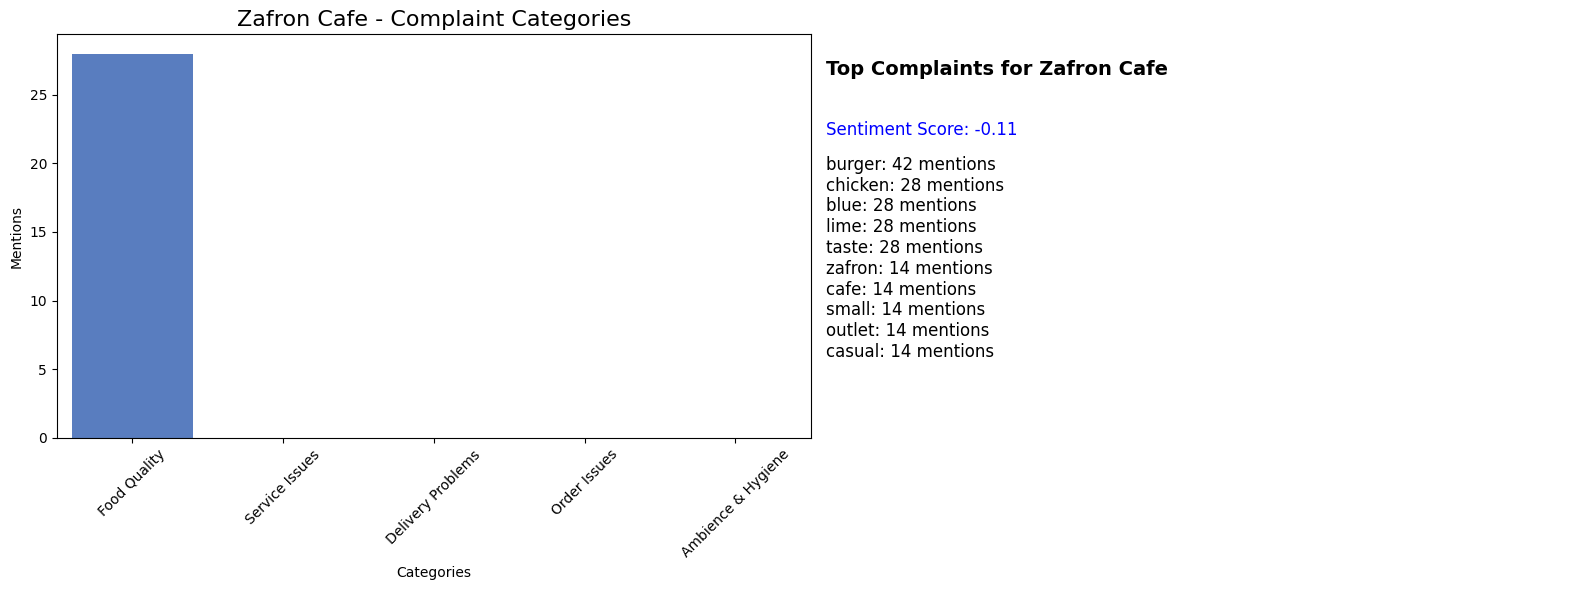

In [ ]:
# Example usage
generate_restaurant_report('Zafron Cafe')


### Each restaurants can see their drawbacks and work upon it to improve their performance